In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pairs import Pairs
import networkx as nx
import pickle

In [2]:
fn = "../data/2015_CN_AZUL/preprocessed_data_test.csv"
# skills = Pairs("skill", fn).get_pairs()
skills = pickle.load(open("skill_influences.pkl", "rb"))
# items = Pairs("item").get_pairs()
skill_graph = nx.to_networkx_graph(skills, create_using=nx.DiGraph)

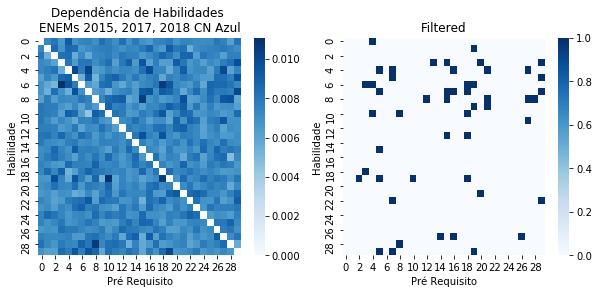

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
c="Blues"
# skills = Pairs("skill").get_pairs()
skills = (np.ones((30,30))-0.3*np.eye(30)) * skills
deps = skills > 0.009

sns.heatmap(skills, cmap=c, ax=ax1)
ax1.set_title("Dependência de Habilidades \nENEMs 2015, 2017, 2018 CN Azul")
ax1.set_xlabel("Pré Requisito")
ax1.set_ylabel("Habilidade")

sns.heatmap(deps, cmap=c, ax=ax2)
ax2.set_title("Filtered")
ax2.set_xlabel("Pré Requisito")
ax2.set_ylabel("Habilidade")

# plt.savefig("./imgs/skills2015_2017_2018.jpg", dpi=400)
plt.show()

# Graph Representation of Dependency Matrix

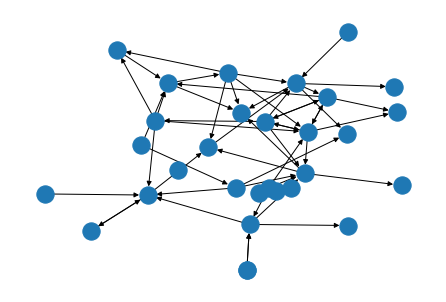

In [6]:
dg = nx.to_networkx_graph(deps.transpose(), create_using=nx.DiGraph)
# nx.draw_kamada_kawai(dg)
nx.write_edgelist(dg,"/home/nicolagp/repos/breaking_cycles_in_noisy_hierarchies/g.edges",data = False)
nx.draw_kamada_kawai(dg)

Representation after removing cycles with minimum feedback arc set algorithm

https://github.com/zhenv5/breaking_cycles_in_noisy_hierarchies
 

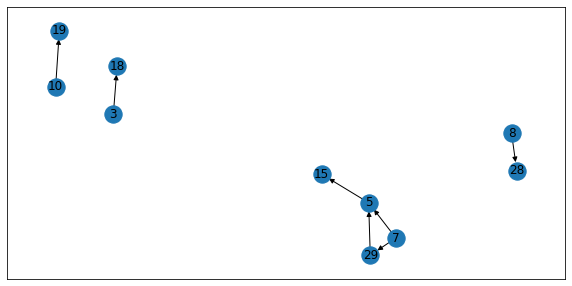

In [7]:
import matplotlib.pyplot as plt
G=nx.read_edgelist("g_removed_by_mfas.edges",create_using = nx.DiGraph(),nodetype = int)
ax, fig = plt.subplots(1,1, figsize=(10,5))
ax = nx.draw_networkx(G)
plt.show()
# add missing nodes
for i in range(30):
    if i not in G.nodes:
        G.add_node(i)

In [172]:
from typing import List

def prereq_bfs(target: int, g: nx.DiGraph, path: List[int], results:List[int]):
    # get neighbors for last element in path
    adj = list(g[path[-1]].keys())
    
    # BASE 1 no adjecent nodes
    if len(adj) == 0:
        return None

    # BASE 2 check if target is adjecent to current node
    if target in adj:
        results.append(path)
        return
    # if not, recurse on adjecent nodes
    else:
        for a in adj:
            prereq_bfs(target, g, path+[a], results)
    
        
def find_paths(target: int, g: nx.DiGraph):
    roots = [k for k,v in g.in_degree() if v == 0]
    paths = []
    for root in roots:
        results = []
        prereq_bfs(target, g, [root], results)
        if len(results) > 0:
            paths += results

    return paths


find_paths(4, G)


[[7, 8, 10], [7, 8, 6, 10]]